# The star class
PBjam is roughly divided into two stages: the mode identification stage followed by the detailed peakbagging stage. The star class wraps these two stages into one neat package, and so is useful for cases where you just want to hit 'Go' and use the default settings in PBjam.

Many of the inputs to the `star` class should be familiar to you if you have used the `modeID` and `peakbag` classes. If not it is advisable that you go through the respective notebooks for more detailed tutorials on these parts. This notebook will just be a brief run-through using the `star` class.

Let's start by loading in some data and computing the power spectrum. In the following we will use the built-in `IO` class in PBjam to download the data (via Lightkurve) and compute the power-density spectrum. You can also use your own method for computing the spectrum, however, bear in mind that PBjam expects the spectrum to be Parseval normalized, such that the variance in the light curve is equal to the sum of power in the spectrum. This is required so that PBjam's priors work correctly. 

In [2]:
from pbjam import IO

psd = IO.psd('KIC10963065', lk_kwargs={'quarter': 6, 'exptime': 60, 'mission':'Kepler', 'author':'Kepler'}, numax=2000)

psd()

f = psd.freq

s = psd.powerdensity

The IO class can take your own time series if you wish and compute the power spectrum, but most of the time it's just as easy to download the data from the MAST servers. Arguments to Lightkurve are given via the `lk_kwargs` argument. `IO` does some mild reduction on the time series, which can be helped by specifying a value of `numax` for the target. This is only used to remove long-term variabiliy via Lightkurves median filtering option, so for most cases you can leave this out if you wish. 

Next we'll initialize the `star` class. Here you can supply the target name or some identifier, which is used to set filenames at the output stage. This can be anything you want. This is followed by the power density in the form of the spectrum frequency bins `f` and the power density `s`. The final required input is the `obs` dictionary, which contains observational parameters of the target. The `numax`, `dnu`, `teff`, and `bp_rp` keywords are used to define the prior used in the mode identification, while the `RV` keyword is used to correct final peakbagged frequencies for any doppler shift due to the targets radial velocity relative to us the observers. Note that the `RV` must be in km/s.

In [3]:
from pbjam import star
 
obs = {'numax': (2204, 100), #muHz
       'dnu'  : (103.2, 0.54), #muHz
       'teff' : (6140, 77), #K
       'bp_rp': (0.70026, 0.05), #mag
       'RV': (-54.76, 0.18) # km/s
        }

N_p = 10

S = star('KIC10963065', f, s, obs, N_p=N_p)

The `star` wraps both the `modeID` and `peakbag` classes, so you can supply inputs to the `star` class that are relevant for either or both classes. In this case we give the `star` class the `N_p` argument which is only relevant to the `modeID` class. This specifies how many radial orders to include in the model.

We can also specify a lot of these arguments during the call to the `star` class instance. Here it's possible to supply overriding arguments to those given when the class initialized, and thereby supply the `peakbag` class with arguments that are different from those going to `modeID`. This can be useful if you, for example, want to run the mode ID on a lower resolution spectrum than the peakbagging.

Calling the class instance with the supplied arguments will initialize and call the `modeID` and `peakbag` classes using the supplied arguments. The output is in the form of two dictionaries, one for each stage of the process.

In [4]:
modeIDResult, peakbagResult = S(peakbag_kwargs={'f':f, 's':s})

15291it [02:03, 124.31it/s, +600 | bound: 147 | nc: 1 | ncall: 443869 | eff(%):  3.585 | loglstar:   -inf < -8918.205 <    inf | logz: -8941.386 +/-  0.179 | dlogz:  0.000 >  0.100]
1697it [00:05, 323.77it/s, +150 | bound: 51 | nc: 1 | ncall: 32154 | eff(%):  5.771 | loglstar:   -inf < -8961.587 <    inf | logz: -8970.530 +/-  0.226 | dlogz:  0.001 >  0.100]
4468it [00:10, 412.18it/s, +150 | bound: 172 | nc: 1 | ncall: 95887 | eff(%):  4.824 | loglstar:   -inf < -8961.565 <    inf | logz: -8970.529 +/-  0.215 | dlogz:  0.000 >  0.000]


Using emcee to sample.
Peakbagging slice 1/1
Burning in sampler
Convergence >> 1: 20.0
Convergence >> 1: 7.8
Convergence >> 1: 4.4
Convergence >> 1: 3.0
Convergence >> 1: 2.0
Convergence >> 1: 1.8
Convergence >> 1: 1.7
Convergence >> 1: 1.3
Convergence >> 1: 1.0
Convergence >> 1: 1.1
Convergence >> 1: 0.8
Sampling posterior.
Time taken 19.9 minutes


The results can be visualized using the built-in plotting functions in PBjam. These can be accessed through the `modeID` and `peakbag` attributes in the `star` class. 

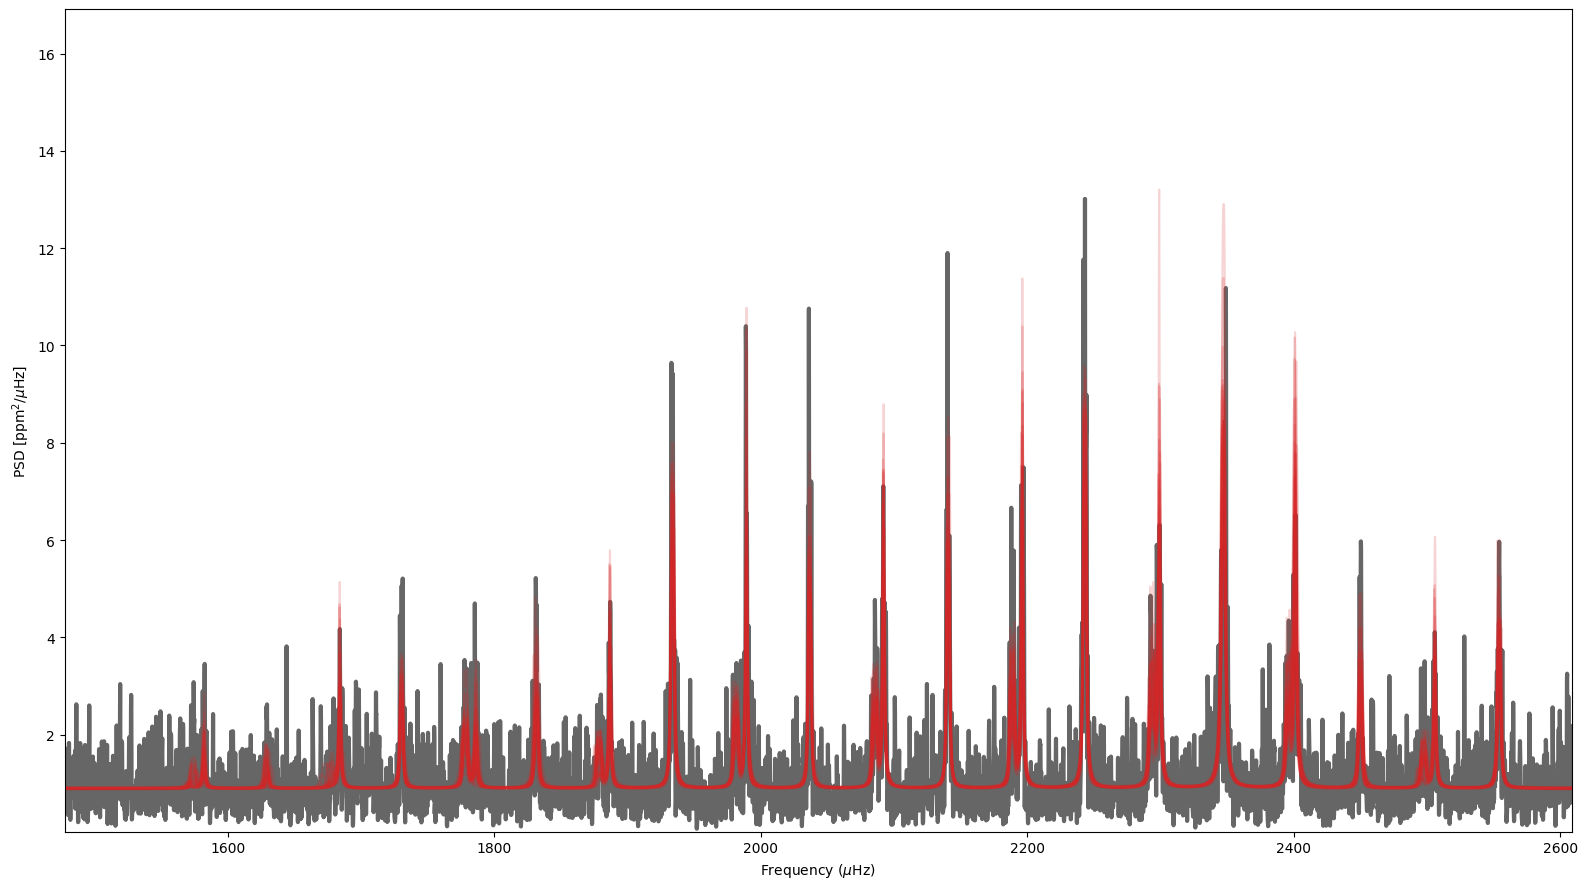

In [7]:
fig, ax = S.peakbag.spectrum()